**1 - Imports**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

**2 - First exercise: Reducing the dimension of some synthetic data**

**2.1 - Extract data**

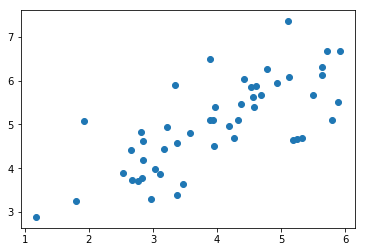

In [2]:
def extract_data(file):
    # Create matrix
    data = []

    # Open the file
    with open(file, 'r') as file:
        for line in file:
            point = line.split()
            
            data.append([float(point[0]), float(point[1])])
    
    return np.array(data)

X = extract_data('data_pca.txt')
plt.scatter(X[:, 0], X[:, 1])

**2.2 - Compute the mean of the points**

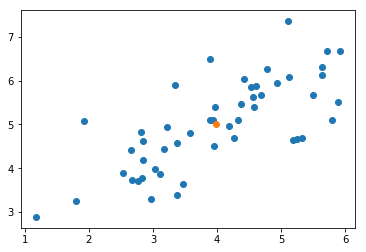

In [3]:
mean_data = np.mean(X, axis=0)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(mean_data[0], mean_data[1])

**2.3 - Centralise the data**

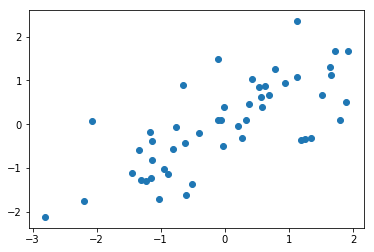

In [4]:
X_centr = X - mean_data

plt.scatter(X_centr[:, 0], X_centr[:, 1])

**2.4 - Compute the covariance**

In [5]:
cov_X = np.cov(X_centr.T)
print(cov_X)

[[1.37606477 0.88301454]
 [0.88301454 1.04737128]]


**2.5 - Find the eigenvector corresponding to the largest eigenvalue of the covariance**

In [6]:
# Get the eignen values and corresponding vectors
eig_vals, eig_vecs = np.linalg.eig(cov_X)

# Make pairs
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort in descending order of eigen value
eig_pairs.sort()
eig_pairs.reverse()

# Keep the eigenvector corresponding to the largest eigenvalue
projection_vect = eig_pairs[0][1]
print('The principal axes of the data is along this vector:', projection_vect)

The principal axes of the data is along this vector: [0.76908317 0.63914872]


**2.6 - Project our data on the vector**

In [7]:
Y_centr = X_centr.dot(projection_vect)

Y_centr

array([-1.49874228,  0.95842326, -1.40323452, -1.76425091, -1.40757522,
        0.87371159, -1.2705341 ,  2.55069325,  0.01467385,  0.83691574,
        0.70218352,  0.58710703,  0.12494323,  0.74692795, -1.67633442,
        2.10277216,  0.95944693, -1.11631972,  2.37073581,  0.6900421 ,
        2.39392811, -0.44282236,  1.98340059,  0.01059725, -1.83206018,
       -0.62718606,  1.33171325,  1.45471326, -1.01920169, -0.01488809,
        0.07208941,  1.78536119, -1.41319507,  0.82641747, -0.75167995,
        1.40555847, -1.82311313,  1.59462045, -2.80785801,  0.32550217,
        0.98575836, -0.98462777, -1.38955413,  1.03738884, -1.87688554,
        0.24535621, -3.51802346, -1.54855517, -0.34417837,  1.55983868])

**2.7 - Post-process the output**

In [16]:
Y = Y_centr + mean_data.dot(projection_vect)

Y

array([4.76687056, 7.22403609, 4.86237831, 4.50136192, 4.85803761,
       7.13932442, 4.99507873, 8.81630608, 6.28028668, 7.10252857,
       6.96779635, 6.85271986, 6.39055606, 7.01254078, 4.58927841,
       8.36838499, 7.22505976, 5.14929311, 8.63634864, 6.95565493,
       8.65954094, 5.82279047, 8.24901342, 6.27621008, 4.43355265,
       5.63842677, 7.59732608, 7.72032609, 5.24641114, 6.25072474,
       6.33770224, 8.05097402, 4.85241776, 7.0920303 , 5.51393288,
       7.6711713 , 4.4424997 , 7.86023328, 3.45775482, 6.591115  ,
       7.2513712 , 5.28098506, 4.87605871, 7.30300167, 4.38872729,
       6.51096904, 2.74758937, 4.71705766, 5.92143446, 7.82545151])

**2.8 - Plot data**

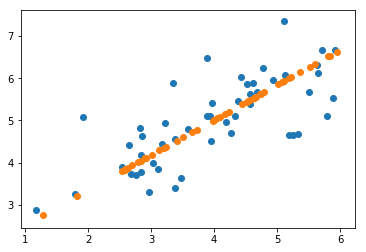

In [14]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y_centr * projection_vect[0] + mean_data[0], Y_centr * projection_vect[1] + mean_data[1])

**3 - Second exercise: Reducing the dimension of some real data**